## CAMELS-AUS

**camels-aus** facilitates access from Python to the CAMELS-AUS dataset: [Fowler, K. J. A., Acharya, S. C., Addor, N., Chou, C., and Peel, M. C.: CAMELS-AUS: Hydrometeorological time series and landscape attributes for 222 catchments in Australia, Earth Syst. Sci. Data Discuss. [preprint], https://doi.org/10.5194/essd-2020-228, in review, 2021. ](https://essd.copernicus.org/preprints/essd-2020-228)


In [1]:
import os
from camels_aus.repository import CamelsAus, download_camels_aus

`CamelsAus` is a repository that takes care of loading the data from disk and fives it access as a consolidated dataset to the user, using xarray for most data.

In [2]:
repo = CamelsAus()

`download_camels_aus` streamlines downloading and extracting the files making up CAMELS-AUS 1.0.

In [3]:
camels_dir = os.path.join(os.getenv("HOME"), 'data/camels/aus')
download_camels_aus(camels_dir)

INFO: /home/per202/data/camels/aus/01_id_name_metadata.zip already exists, skipping download
INFO: /home/per202/data/camels/aus/02_location_boundary_area.zip already exists, skipping download
INFO: /home/per202/data/camels/aus/03_streamflow.zip already exists, skipping download
INFO: /home/per202/data/camels/aus/04_attributes.zip already exists, skipping download
INFO: /home/per202/data/camels/aus/05_hydrometeorology.zip already exists, skipping download
INFO: /home/per202/data/camels/aus/CAMELS_AUS_Attributes-Indices_MasterTable.csv already exists, skipping download
INFO: /home/per202/data/camels/aus/CAMELS_AUS_ReferenceList.pdf already exists, skipping download
INFO: /home/per202/data/camels/aus/Units_01_TimeseriesData.pdf already exists, skipping download
INFO: /home/per202/data/camels/aus/Units_02_AttributeMasterTable.pdf already exists, skipping download
INFO: /home/per202/data/camels/aus/01_id_name_metadata already exists, skipping extraction
INFO: /home/per202/data/camels/aus/02

In [4]:
repo.load_from_text_files(camels_dir)
repo.data

<xarray.Dataset>
Dimensions:                  (station_id: 222, time: 43464)
Coordinates:
  * station_id               (station_id) object '912101A' ... '318076'
  * time                     (time) datetime64[ns] 1900-01-01 ... 2018-12-31
Data variables: (12/17)
    station_name             (station_id) object 'Gregory River at Gregory Do...
    drainage_division        (station_id) object 'Carpentaria Coast' ... 'Tas...
    river_region             (station_id) object 'NICHOLSON-LEICHHARDT RIVERS...
    notes                    (station_id) object 'No notes' ... 'No notes'
    streamflow_mmd           (time, station_id) float32 nan nan nan ... nan nan
    streamflow_QualityCodes  (time, station_id) object nan nan nan ... nan nan
    ...                       ...
    long_centroid            (station_id) float64 138.6 138.5 ... 146.0 147.5
    map_zone                 (station_id) int64 54 54 55 55 55 ... 55 55 55 55
    catchment_area           (station_id) float64 1.258e+04 1.139e+04 ... 374.2
    nested_status            (station_id) object 'Not nested' ... 'Not nested'
    next_station_ds          (station_id) object nan '912101A' nan ... nan nan
    num_nested_within        (station_id) int64 1 0 0 0 0 0 0 ... 1 0 0 0 0 0 0

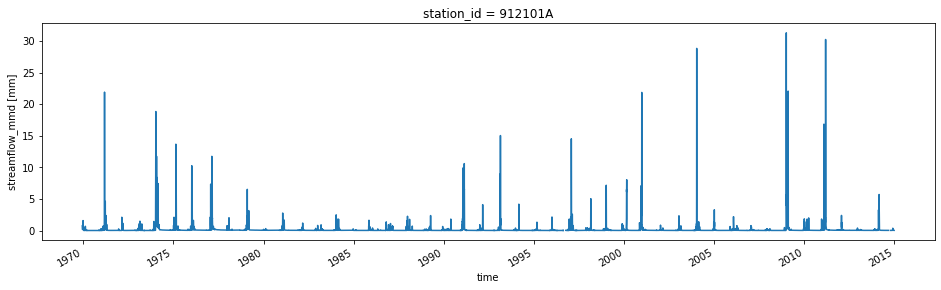

In [5]:
repo.data.streamflow_mmd.sel(station_id='912101A').plot(figsize = (16,4))

<AxesSubplot:>

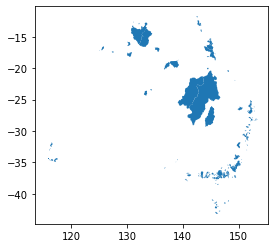

In [6]:
repo.boundaries.plot()

### Experimental interactive viewer with ipyleaflet

Using personal experimental components ([ipyleaflet-dashboard-tools](https://github.com/jmp75/ipyleaflet-dashboard-tools)) that should probably find a home to [leafmaptools](https://github.com/giswqs/leafmaptools)

![leaflet_viewer_teaser.png](https://github.com/csiro-hydroinformatics/camels-aus-py/raw/testing/docs/examples/leaflet_viewer_teaser.png)


In [7]:
import matplotlib
from ipywidgets import Output, HBox
from ipyleaflet_dashboard_tools.gv import *

import json
from ipyleaflet import Map, GeoJSON

In [8]:
# ds = repo.data
# v = GeoViewer(ds, lat='lat_outlet', lon='long_outlet', key='station_id')

# out = Output()

# click_handler_plot_ts = v.mk_click_handler_plot_ts(out, variable="streamflow_mmd")
# mapview = v.build_map(click_handler_plot_ts)

# mapview.layout.height = '600px'

# gj = repo.boundaries.to_json()
# d = json.loads(gj)

# geo_json = GeoJSON(data=d, style = {'color': 'Blue', 'opacity':1, 'weight':1.9, 'dashArray':'9', 'fillOpacity':0.1})
# mapview.add_layer(geo_json)
# HBox([mapview, out])

